In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO


from scipy.interpolate import UnivariateSpline

# Reading data

CSV format

In [2]:
#from bigfloat import *

def isNaN(string):
    return string != string
print(isNaN("hello"))
print(isNaN(np.nan))

False
True


Muninn format

In [9]:
res=1
vars=["m", "beta", "psi", "derpsi"]
time=[]
grid=[]
m=[]
beta=[]
psi=[]
derpsi=[]
k=1
m_ori=[]
m_scri=[]
beta_ori=[]
beta_scri=[]
psi_ori=[]
psi_scri=[]
derpsi_ori=[]
derpsi_scri=[]

for var in vars:
   
    #nearcriticalone TRASH
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/nearcritical/{}.txt".format(var)
    
    #nearcriticaltwo (more tuned) TRASH
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/nearcritical0.1256/{}.txt".format(var)
    
    #subcriticalone A=0.01 TRASH
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.01/{}.txt".format(var)
    
    #subcriticaltwo A=0.001
    dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/{}.txt".format(var)
    
    #supercritical A=0.17 N=400
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/supercritical0.17/{}.txt".format(var)
    
    ##new##
    
    #A0.1256 called it nearcritical but its actually subcritical 
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/0.1256/muninnDATA/res1/{}.txt".format(var)

    
    print(dir)
    t=0
    with open(dir) as f:
        for line in f:

            index = line.find("Time")
            
            if index==1:
                t=t+1
                if k==1:
                    time.append(float(line[index+7:len(line)-1]))
                auxgrid=[]
                auxdata=[]
                

            else:
                
                a=line.split()
                if a!=[]:
                    if k==1:
                        auxgrid.append(float(a[0]))
                    auxdata.append(float(a[1]))
                    
                elif a==[]:
                    
                    
                    if k==1:
                        if t==1:
                            grid.append(auxgrid)
                        L=len(auxgrid)
                        m_ori.append(auxdata[3])
                        m_scri.append(auxdata[L-4])
                    elif k==2:
                        beta_ori.append(auxdata[3])
                        beta_scri.append(auxdata[L-4])
                    elif k==3:
                        psi_ori.append(auxdata[3])
                        psi_scri.append(auxdata[L-4])
                    elif k==4:
                        derpsi_ori.append(auxdata[3])
                        derpsi_scri.append(auxdata[L-4])
                    
    k=k+1

#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/m.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/beta.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/psi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/derpsi.txt


In [10]:
#m_nearcriticalone=m_scri
#x_nearcriticalone=converttobondi(time,beta_scri)

#m_nearcriticaltwo=m_scri
#x_nearcriticaltwo=converttobondi(time,beta_scri)

#m_subcriticalone=m_scri
#x_subcriticalone=converttobondi(time,beta_scri)


## data used for plots:

m_subcriticaltwo=m_scri
x_subcriticaltwo=converttobondi(time,beta_scri)

#m_supercritical=m_scri
#x_supercritical=converttobondi(time,beta_scri)

#m_new=m_scri
#x_new=converttobondi(time,beta_scri)


# Convert to Bondi

In [4]:
#trapezoidal rule
def trap_integrator(func,f0,x):
    integration=[f0]
    for i in range(0,len(x)-1):
        dx=x[i+1]-x[i]
    
        integral=dx/2*(func(x[i+1])+func(x[i]))
        
        integration.append(integration[i]+integral)
    return integration

"""def funcc(x):
    return x

def trap_integrator(func,f0,x0,x1):
    dx=(x1-x0)
    integral=dx/2*(func(x0)+func(x1))
    
    return f0+integral

trap_integrator(funcc,0,0,1)"""

#convert central time to bondi time
def converttobondi(time, betascri):

    spl = UnivariateSpline(time, np.multiply(np.exp(np.multiply(betascri,-2)),time), s=0)

    return trap_integrator(spl,0,time)

####

# Styling plots

In [5]:
plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':12,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

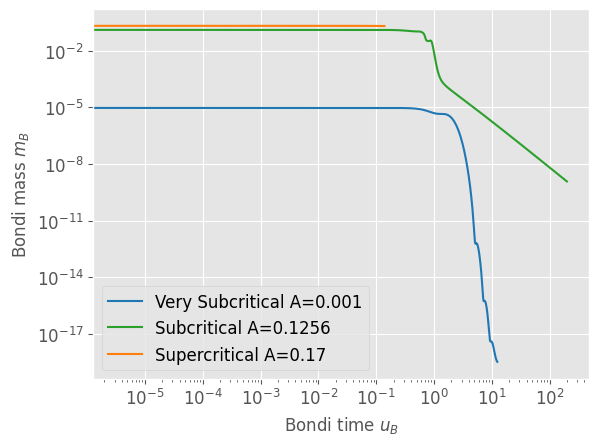

In [37]:

with plt.style.context('ggplot'):  
    
    plt.plot(x_subcriticaltwo, m_subcriticaltwo,label="Very Subcritical A=0.001",color='#1f77b4')
    
    plt.plot(x_new, m_new,label="Subcritical A=0.1256",color='#2ca02c')
    
    plt.plot(x_supercritical, m_supercritical,label="Supercritical A=0.17",color='#ff7f0e')

    
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Bondi time $u_B$")#$\u03C4$")
    plt.ylabel("Bondi mass $m_B$")#$\u03C4$")
    #plt.title('Bondi mass decay')
    plt.legend();

    #plt.xlim([2,200])
    #plt.ylim([1e-9,8e-5])
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [21]:

plt.plot(x_new[800:6000], func(x_new[800:6000], *popt), label='fit: a=%5.3f, b=%5.3f' % tuple(popt),linestyle='dashed')

plt.xscale("log")
plt.yscale("log")

NameError: name 'func' is not defined

In [22]:
len(x_new)

6667

In [23]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

def func(x, a, b):
    if type(x)==float:
        return a * x + b
    else:
        z=np.zeros(len(x))
        for i in range(0,len(x)):
            z[i] = a * x[i] + b
        return z

In [24]:
"""popt, pcov = curve_fit(func, x_new[1100:6667], m_new[1100:6667])

plt.plot(x_new[1100:6667], func(x_new[1100:6667], *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))""";

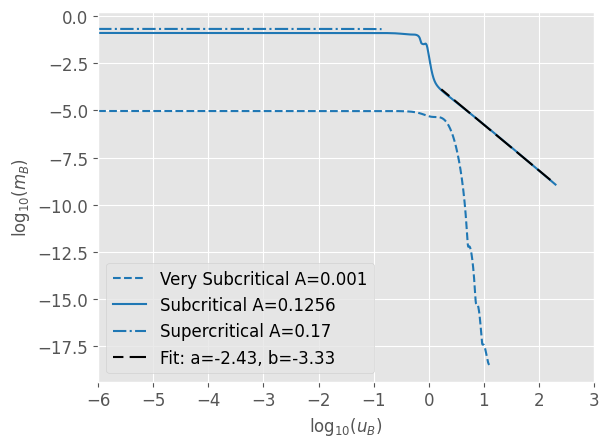

In [40]:
x_newlog = [math.log10(float(x)) for x in x_new[1:len(x_new)]]
y_newlog = [math.log10(float(x)) for x in m_new[1:len(x_new)]]

x_subcriticaltwolog = [math.log10(float(x)) for x in x_subcriticaltwo[1:len(x_subcriticaltwo)]]
m_subcriticaltwolog = [math.log10(float(x)) for x in m_subcriticaltwo[1:len(x_subcriticaltwo)]]
x_supercriticallog = [math.log10(float(x)) for x in x_supercritical[1:len(x_supercritical)]]
m_supercriticallog = [math.log10(float(x)) for x in m_supercritical[1:len(x_supercritical)]]

xx = [math.log10(float(x)) for x in x_new[800:6000]]
yy = [math.log10(float(x)) for x in m_new[800:6000]]

popt, pcov = curve_fit(func, xx, yy)

with plt.style.context('ggplot'):  
    
    #data
    plt.plot([-6]+x_subcriticaltwolog, [m_subcriticaltwolog[0]]+m_subcriticaltwolog,label="Very Subcritical A=0.001",color='#1f77b4',linestyle='dashed')
    
    plt.plot([-6]+x_newlog,[y_newlog[0]]+y_newlog,label="Subcritical A=0.1256",color='#1f77b4')
    
    plt.plot([-6]+x_supercriticallog, [m_supercriticallog[0]]+m_supercriticallog,label="Supercritical A=0.17",color='#1f77b4',linestyle='dashdot')
    
    #fit
    plt.plot(xx, func(xx, *popt), label='Fit: a=%5.2f, b=%5.2f' % tuple(popt),color='#000000',linestyle=(5,(10,3)))
   

    plt.xlim([-6,3])
    plt.xlabel("log$_{10}$($u_B$)")#$\u03C4$")
    plt.ylabel("log$_{10}$($m_B$)")#$\u03C4$")
    plt.legend();

    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [91]:
x_new

[0,
 3.1708949349049476e-06,
 1.2679256390146471e-05,
 2.851641912926009e-05,
 5.067368078032013e-05,
 7.914230171725346e-05,
 0.00011391350494206615,
 0.00015497847596779725,
 0.00020232836270416465,
 0.00025595427534369464,
 0.00031584728624915986,
 0.00038199842984277393,
 0.0004543987024969538,
 0.0005330390624265303,
 0.0006179104295825324,
 0.0007090036855483689,
 0.0008063096734378413,
 0.0009098191977928544,
 0.001019523024484727,
 0.0011354118806182775,
 0.0012574764544369976,
 0.0013857073952286295,
 0.0015200953132352116,
 0.0016606307795635365,
 0.0018073043260978224,
 0.001960106445418546,
 0.0021190275907193596,
 0.002284058175725869,
 0.002455188574619737,
 0.002632409121963329,
 0.0028157101126285618,
 0.0030050818017260403,
 0.0032005144045406278,
 0.00340199809646935,
 0.0036095230129561647,
 0.0038230792494326716,
 0.00404265686126807,
 0.004268245863715315,
 0.004499836231860197,
 0.004737417900579606,
 0.004980980764496037,
 0.005230514677936938,
 0.005486009454899

array([-2.4436141 , -3.30513218])

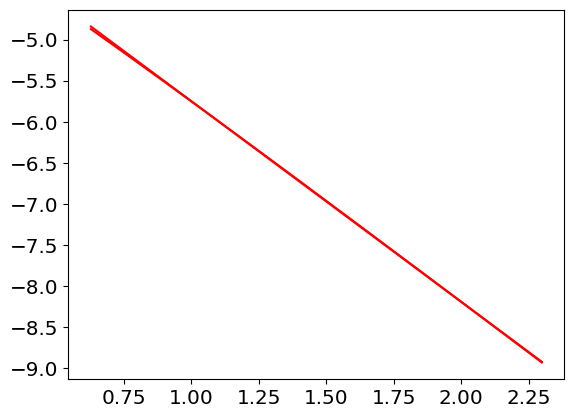

In [105]:
xx = [math.log10(float(x)) for x in x_new[1100:6667]]
yy = [math.log10(float(x)) for x in m_new[1100:6667]]


plt.plot(xx,yy, 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))

popt, pcov = curve_fit(func, xx, yy)

plt.plot(xx, func(xx, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.plot
popt

In [69]:
ln10(m)=-2.4ln(ub)-3.3

1.0

In [ ]:
mb=const*ub^-2.4

Figure 7 attempt

In [187]:
adapt_time=[]
tau_star=0.15
for x in x_supercritical:
    if x<=tau_star:
        adapt_time.append(-math.log(abs((tau_star-x))))
        
adapt_time;

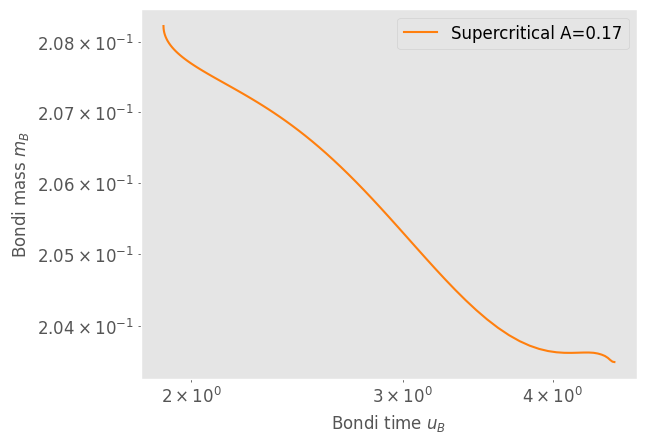

In [189]:

with plt.style.context('ggplot'):
    
    #plt.plot(x_supercritical, m_supercritical,label="Supercritical A=0.17",color='#ff7f0e')
    plt.plot(adapt_time[0:len(m_supercritical)], m_supercritical,label="Supercritical A=0.17",color='#ff7f0e')

    plt.xscale("log")
    plt.yscale("log")
    
    plt.xlabel("Bondi time $u_B$")#$\u03C4$")
    plt.ylabel("Bondi mass $m_B$")#$\u03C4$")
    #plt.title('Bondi mass decay')
    plt.legend();
    #plt.ylim([1e-6,1])
    #plt.xlim([0,5])
    #plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    plt.show()

Value of Bondi mass at scri+ over time

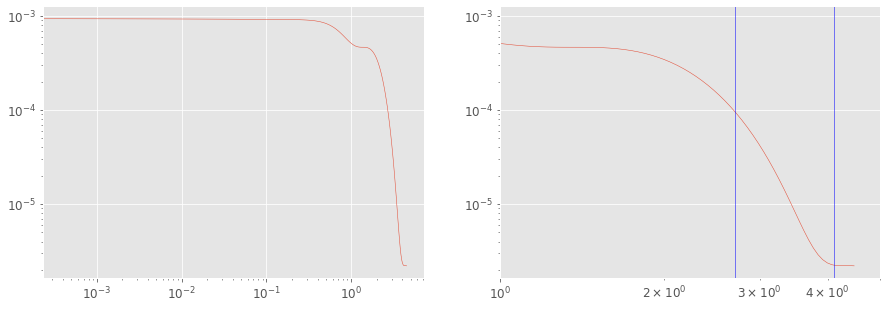

In [292]:
with plt.style.context('ggplot'):
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))

    ax1.plot(x_subcriticalone,m_subcriticalone,linewidth=0.5)
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    
    ax2.plot(aa,m_subcriticalone,linewidth=0.5)
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    
    ax2.set_xlim([1,5])
    ax2.axvline(x = 2.7, color = 'b', linewidth=0.5)
    ax2.axvline(x = 4.1, color = 'b', linewidth=0.5)
 
    
    
    plt.show()

In [29]:
(10^(-16)-10^(-8))/(4.1-2.7)

14.285714285714292

# Mass scaling

In [10]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

def func(x, a, b):
    
    if type(x)==float:
        return a * x + b
    else:
        z=np.zeros(len(x))
        for i in range(0,len(x)):
            z[i] = a * x[i] + b
        return z
    end


In [44]:
m=[]


dir = "/home/rita13santos/Desktop/massscalingdatanewsigm"
#dir = "/home/rita13santos/Desktop/massscalingdata/morepoitns"
#dir = "/home/rita13santos/Desktop/massscalingdata"

print(dir)
    
count=0
for path in os.listdir(dir):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir, path)):
        count += 1
print('File count in dir', dir, 'is: ', count)


with pd.option_context('display.precision', 20):
    df = pd.read_csv(dir + "/parameters.csv", header=None, dtype = str)
    """df = df.to_numpy()
    df = np.transpose(df)"""

/home/rita13santos/Desktop/massscalingdatanewsigm
File count in dir /home/rita13santos/Desktop/massscalingdatanewsigm is:  2


In [45]:
len(df[1])
#df[1:len(df[1]),7]

42

In [46]:
df

,0,1,2,3,4,5,6,7
0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
1,0.0,0.14985093340214264,0.4,0.7,0.0,0.0,1.0,0.0
2,0.0,0.14985093340214264,0.4,0.7,3.0,0.0,1.0,0.0
3,0.0,0.14985093340220337,0.4,0.7,3.0,0.0,2.0,0.0
4,1.0,0.14985093340230346,0.4,0.7,2.3204032668493912,0.0,3.0,0.0001750927839906397
5,1.0,0.14985093340246847,0.4,0.7,2.320403242122292,0.0,4.0,0.00017510906474843557
6,1.0,0.14985093340274053,0.4,0.7,2.3204032013450417,0.0,5.0,0.0001751359191171324
7,1.0,0.14985093340318908,0.4,0.7,2.320403134120239,0.0,6.0,0.00017518020693635275
8,1.0,0.1498509334039286,0.4,0.7,2.3204030233059085,0.0,7.0,0.00017525325534767887
9,1.0,0.1498509334051479,0.4,0.7,2.3204028406327217,0.0,8.0,0.00017537379189906638


In [47]:
auxm=list(df.get(7))
mdata=auxm[2:len(auxm)]
mdata;
auxp=list(df.get(1))
pdata=auxp[2:len(auxp)]
pdata;

In [48]:
#pstar=0.12465049029170887
##OR##
pstar=0.14985093340204908 #baltasar, new sigma
xgraph = [np.log(float(x) - pstar) for x in pdata]
ygraph = [np.log(float(x)) for x in mdata]

/tmp/ipykernel_13052/2823908785.py:5: RuntimeWarning: divide by zero encountered in log
  ygraph = [np.log(float(x)) for x in mdata]


'plt.xscale("log")\nplt.yscale("log")'

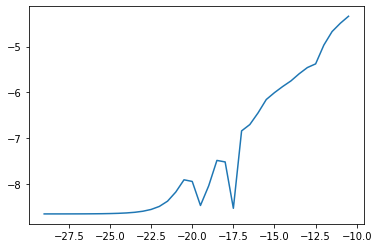

In [49]:
plt.plot(xgraph,ygraph)
"""plt.xscale("log")
plt.yscale("log")"""
#plt.xlim([-16,-6])

Mass scaling 2

In [39]:


popt, pcov = curve_fit(func, xgraph[26:len(xgraph)],ygraph[26:len(ygraph)])

popt

#plt.plot(xgraph[28:len(xgraph)], func(xgraph[28:len(xgraph)], *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

array([ 0.37646839, -0.44144838])

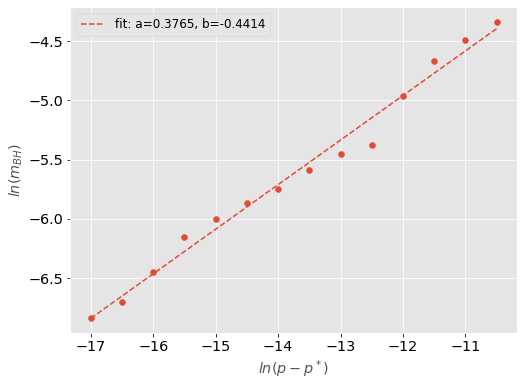

In [29]:

with plt.style.context('ggplot'):
    
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"]= 12
    plt.rcParams["legend.fontsize"]= 12
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"


    plt.scatter(xgraph[26:len(xgraph)],ygraph[26:len(ygraph)],s=35)
    #plt.scatter(converttobondi(time,beta_scri)[0:len(time)-1],massloss, alpha=0.5,s=20)
    #plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp,label='Numerical',linewidth=1)
    #plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],massloss,label='Analytical',linewidth=1,alpha=0.5)
    
    
    plt.plot(xgraph[26:len(xgraph)], func(xgraph[26:len(xgraph)], *popt), label='fit: a=%5.4f, b=%5.4f' % tuple(popt),linestyle='dashed')

    plt.xlabel("$ln(p-p^*)$")#$\u03C4$")
    plt.ylabel("$ln(m_{BH}$)")#$\u03C4$")
    
    plt.legend();
#olor='#1f77b4'
#color='#ff7f0e'
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

    plt.show()
#plt.xlim([0,3])

In [23]:
0.3765*2

0.753

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


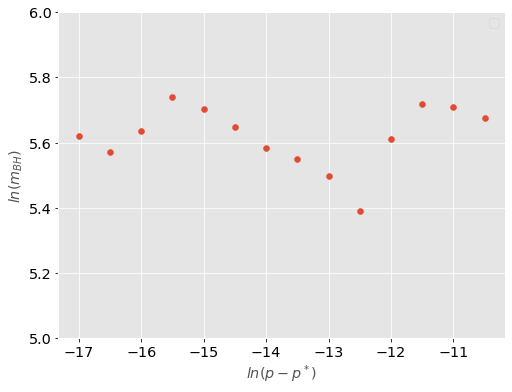

In [28]:
avg=0
k=0
for m in ygraph[26:len(ygraph)]:
    avg=avg+m
    k=k+1
avg=avg/k

#plt.ylim([4,6])


with plt.style.context('ggplot'):
    
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"]= 12
    plt.rcParams["legend.fontsize"]= 12
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"
    
    
    plt.scatter(xgraph[26:len(xgraph)],np.subtract(np.subtract(ygraph[26:len(ygraph)],avg),func(xgraph[26:len(xgraph)], *popt)))

    plt.xlabel("$ln(p-p^*)$")#$\u03C4$")
    plt.ylabel("$ln(m_{BH}$)")#$\u03C4$")
    
    plt.legend();
    plt.ylim([5,6])
#olor='#1f77b4'
#color='#ff7f0e'
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

    plt.show()
#plt.xlim([0,3])

WE JUST USE 2000POINTS which is enough to approximate the mass when the peak in 2m/r is formed but not enough to resolv it well.

this is MORE SPARSED THAN OUR FIRST CALCULATION OF GAMMA, bc its just fo confirm

Mass scaling 1

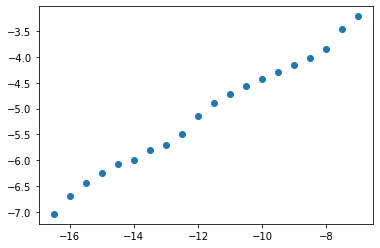

In [30]:
plt.scatter(xgraph[27:len(xgraph)],ygraph[27:len(ygraph)])



In [32]:
xgraph[27:len(xgraph)]

In [ ]:
-16.25 -15.75 -15.25 -14.75 -14.25 -13.75 -13.25 -12.75 -12.25 -11.75 -11.25 -10.75 -10.25 -9.75 -9.25 -8.75 -8.25 -7.75 -7.25

##### 

(4.0, 6.0)

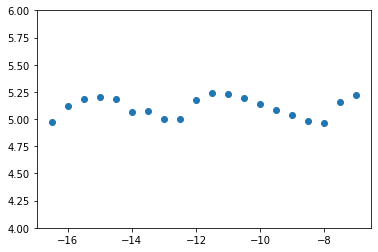

In [19]:
avg=0
k=0
for m in ygraph[27:len(ygraph)]:
    avg=avg+m
    k=k+1
avg=avg/k

plt.scatter(xgraph[27:len(xgraph)],np.subtract(np.subtract(ygraph[27:len(ygraph)],avg),func(xgraph[27:len(xgraph)], *popt)))
plt.ylim([4,6])

#plt.ylim([0,3])
#plt.plot(xgraph[27:len(xgraph)],np.subtract(ygraph[27:len(ygraph)],func(xgraph[27:len(xgraph)], *popt)))

In [13]:


popt, pcov = curve_fit(func, xgraph[27:len(xgraph)],ygraph[27:len(ygraph)])

popt

#plt.plot(xgraph[28:len(xgraph)], func(xgraph[28:len(xgraph)], *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

array([ 0.37609814, -0.69184278])

In [18]:
0.74853009/2

0.36481431

In [33]:
0.7485/2

0.37425

In [ ]:
0.37041644*ln(p-p*)-0.74853009=ln(m)

In [ ]:
e^0.37041644*ln(p-p*)-0.74853009=ln(m)

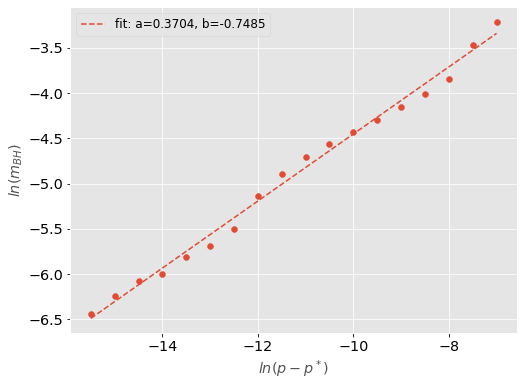

In [34]:

with plt.style.context('ggplot'):
    
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"]= 12
    plt.rcParams["legend.fontsize"]= 12
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"


    plt.scatter(xgraph[29:len(xgraph)],ygraph[29:len(ygraph)],s=35)
    #plt.scatter(converttobondi(time,beta_scri)[0:len(time)-1],massloss, alpha=0.5,s=20)
    #plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp,label='Numerical',linewidth=1)
    #plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],massloss,label='Analytical',linewidth=1,alpha=0.5)
    
    
    plt.plot(xgraph[29:len(xgraph)], func(xgraph[29:len(xgraph)], *popt), label='fit: a=%5.4f, b=%5.4f' % tuple(popt),linestyle='dashed')

    plt.xlabel("$ln(p-p^*)$")#$\u03C4$")
    plt.ylabel("$ln(m_{BH}$)")#$\u03C4$")
    
    plt.legend();
#olor='#1f77b4'
#color='#ff7f0e'
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

    plt.show()
#plt.xlim([0,3])

# more points mass scaling1

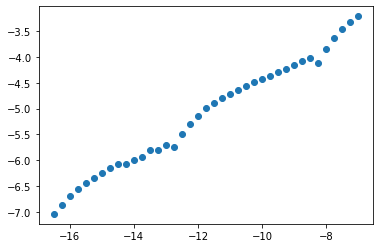

In [49]:
x1=np.array(x1)
xgraph=np.array(xgraph)
np.concatenate((x1, xgraph))

y1=np.array(y1)
ygraph=np.array(ygraph)
b=np.concatenate((y1, ygraph))
plt.scatter(a,b)

In [52]:


popt, pcov = curve_fit(func, a,b)

popt

#plt.plot(xgraph[28:len(xgraph)], func(xgraph[28:len(xgraph)], *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

array([ 0.37314396, -0.73527087])

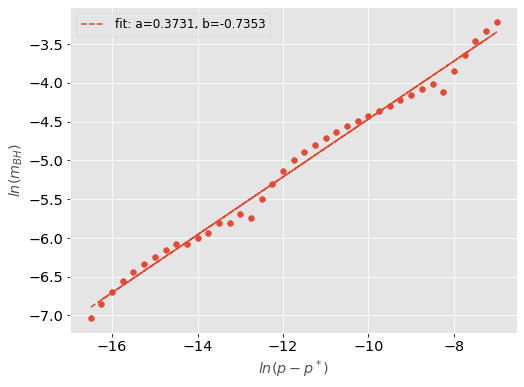

In [76]:

with plt.style.context('ggplot'):
    
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"]= 12
    plt.rcParams["legend.fontsize"]= 12
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"


    plt.scatter(a,b,s=35)
    plt.plot(a, func(a, *popt), label='fit: a=%5.4f, b=%5.4f' % tuple(popt),linestyle='dashed')

    plt.xlabel("$ln(p-p^*)$")#$\u03C4$")
    plt.ylabel("$ln(m_{BH}$)")#$\u03C4$")
    
    plt.legend();
#olor='#1f77b4'
#color='#ff7f0e'
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

    plt.show()
#plt.xlim([0,3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


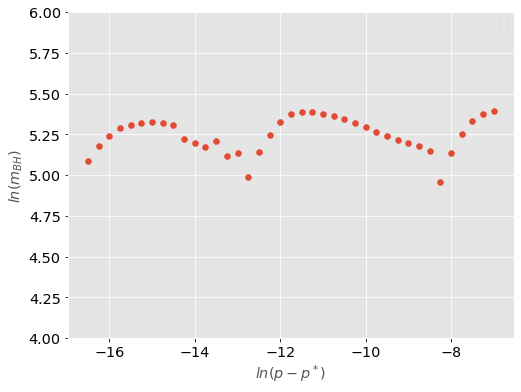

In [75]:
avg=0
k=0
for m in b:
    avg=avg+m
    k=k+1
avg=avg/k

#plt.ylim([4,6])


with plt.style.context('ggplot'):
    
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"]= 12
    plt.rcParams["legend.fontsize"]= 12
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"
    
    
    plt.scatter(a,np.subtract(np.subtract(b,avg),func(a, *new)))

    plt.xlabel("$ln(p-p^*)$")#$\u03C4$")
    plt.ylabel("$ln(m_{BH}$)")#$\u03C4$")
    
    plt.legend();
    plt.ylim([4,6])
#olor='#1f77b4'
#color='#ff7f0e'
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

    plt.show()
#plt.xlim([0,3])

In [62]:
popt

array([ 0.37314396, -0.73527087])

In [74]:
new=np.array([0.370, -0.9])

# More points mass scaling 2

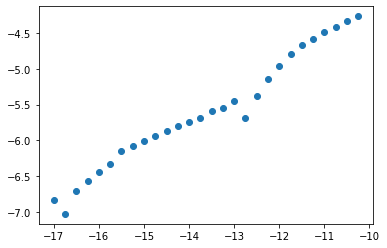

In [58]:
x1=np.array(x1)

a=np.concatenate((x1, xgraph[26:len(xgraph)]))

y1=np.array(y1)
b=np.concatenate((y1, ygraph[26:len(xgraph)]))

plt.scatter(a,b)

In [52]:
x1
xgraph
np.concatenate((x1, xgraph[26:len(xgraph)]))

array([-16.75, -16.25, -15.75, -15.25, -14.75, -14.25, -13.75, -13.25,
       -12.75, -12.25, -11.75, -11.25, -10.75, -10.25, -17.  , -16.5 ,
       -16.  , -15.5 , -15.  , -14.5 , -14.  , -13.5 , -13.  , -12.5 ,
       -12.  , -11.5 , -11.  , -10.5 ])

In [59]:


popt, pcov = curve_fit(func, a,b)

popt

#plt.plot(xgraph[28:len(xgraph)], func(xgraph[28:len(xgraph)], *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

array([ 0.38276417, -0.37462436])

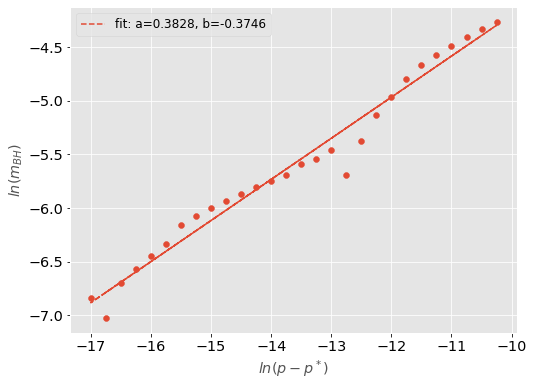

In [60]:

with plt.style.context('ggplot'):
    
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"]= 12
    plt.rcParams["legend.fontsize"]= 12
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"


    plt.scatter(a,b,s=35)
    plt.plot(a, func(a, *popt), label='fit: a=%5.4f, b=%5.4f' % tuple(popt),linestyle='dashed')

    plt.xlabel("$ln(p-p^*)$")#$\u03C4$")
    plt.ylabel("$ln(m_{BH}$)")#$\u03C4$")
    
    plt.legend();
#olor='#1f77b4'
#color='#ff7f0e'
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

    plt.show()
#plt.xlim([0,3])

# Mass decay

A=0.1256

m,u = 4 pi r phi,u ((r-2m)phi,r- exp(-2beta)r phi,u)

In [39]:
res=1
vars=["m", "beta", "psi", "derpsi"]
time=[]
grid=[]
m=[]
beta=[]
psi=[]
derpsi=[]
k=1
m_ori=[]
m_scri=[]
beta_ori=[]
beta_scri=[]
psi_ori=[]
psi_scri=[]
derpsi_ori=[]
derpsi_scri=[]

for var in vars:
   
    #A0.1256 called it nearcritical but its actually subcritical 
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/0.1256/muninnDATA/res1/{}.txt".format(var)
    
    #subcriticaltwo A=0.001
    dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/{}.txt".format(var)
    
    
    print(dir)
    t=0
    with open(dir) as f:
        for line in f:

            index = line.find("Time")
            
            if index==1:
                t=t+1
                if k==1:
                    time.append(float(line[index+7:len(line)-1]))
                auxgrid=[]
                auxdata=[]
                

            else:
                
                a=line.split()
                if a!=[]:
                    if k==1:
                        auxgrid.append(float(a[0]))
                    auxdata.append(float(a[1]))
                    
                elif a==[]:
                    
                    
                    if k==1:
                        if t==1:
                            grid.append(auxgrid)
                        L=len(auxgrid)
                        m_ori.append(auxdata[3])
                        m_scri.append(auxdata[L-4])
                    elif k==2:
                        beta_ori.append(auxdata[3])
                        beta_scri.append(auxdata[L-4])
                    elif k==3:
                        psi_ori.append(auxdata[3])
                        psi_scri.append(auxdata[L-4])
                    elif k==4:
                        derpsi_ori.append(auxdata[3])
                        derpsi_scri.append(auxdata[L-4])
                    
    k=k+1

#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/m.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/beta.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/psi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/derpsi.txt


In [40]:
(m^(1,0))[ut,x]->4 \[Pi]*x* (\[CapitalPhi]^(1,0))[ut,x]( 1-E^(-2 \[Beta][ut,x/(1-x)]) r^2(\[CapitalPhi]^(1,0))[ut,x])

SyntaxError: invalid syntax (3935730999.py, line 1)

In [41]:
#phi,u
deruphi = []

for i in range(0, len(psi_scri)-1):
    aux=(psi_scri[i+1]-psi_scri[i])/(time[i+1]-time[i])##eq.59 from my report ref eq:news
    deruphi.append(aux)

#theoretical mass loss

massloss=[]

for i in range(0, len(psi_scri)-1):
    
    aux=-4*math.pi*deruphi[i]**2*math.exp(-2*beta_scri[i])
    massloss.append(aux)


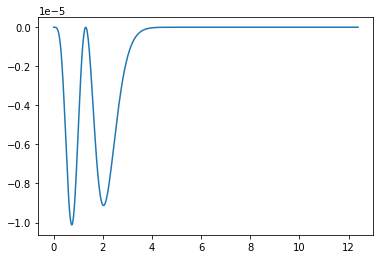

In [53]:
plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],massloss)

In [43]:
#experimental mass loss
masslossexp=[]
for i in range(0, len(m_scri)-1):
    aux=(m_scri[i+1]-m_scri[i])/(time[i+1]-time[i])##eq.59 from my report ref eq:news
    masslossexp.append(aux)

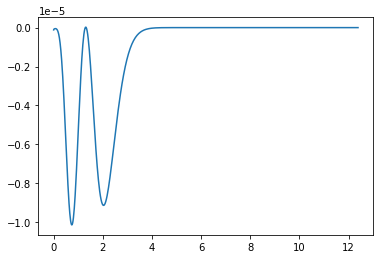

In [57]:
plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp,label='fefw')


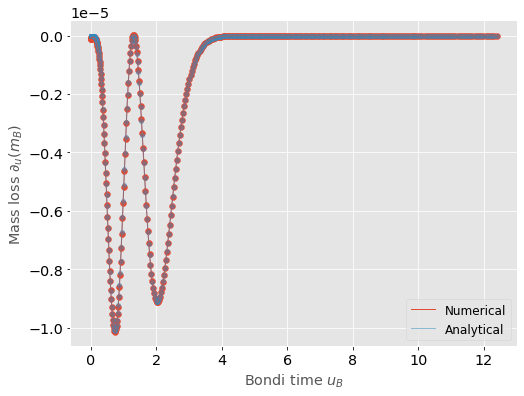

In [123]:

with plt.style.context('ggplot'):
    
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"]= 12
    plt.rcParams["legend.fontsize"]= 12
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"

    
    plt.scatter(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp,s=35)
    plt.scatter(converttobondi(time,beta_scri)[0:len(time)-1],massloss, alpha=0.5,s=20)
    plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp,label='Numerical',linewidth=1)
    plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],massloss,label='Analytical',linewidth=1,alpha=0.5)
    
    plt.xlabel("Bondi time $u_B$")#$\u03C4$")
    plt.ylabel("Mass loss $\partial_u(m_B)$")#$\u03C4$")
    
    plt.legend();
#olor='#1f77b4'
#color='#ff7f0e'
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

    plt.show()
#plt.xlim([0,3])

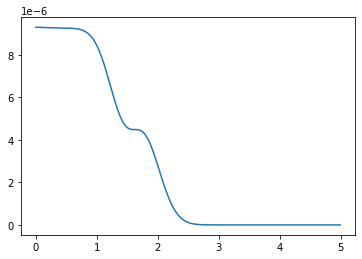

In [45]:
plt.plot(time,m_scri)